<a href="https://colab.research.google.com/github/DarshanS20/Cryptocurrency-Prediction/blob/main/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Stock price Prediction using LSTM

![image](https://blog.floydhub.com/content/images/2019/06/Slide19.JPG)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Importing Library

In [ ]:
 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM



import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# 3. Loading Dataset

In [ ]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('BTC-USD.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2829
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(2829, 7)

In [ ]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2824,2022-06-11,29084.666016,29401.916016,28236.212891,28360.810547,28360.810547,27246574439
2825,2022-06-12,28373.513672,28502.685547,26762.648438,26762.648438,26762.648438,34163220274
2826,2022-06-13,26737.578125,26795.589844,22141.257813,22487.388672,22487.388672,68204556440
2827,2022-06-14,22487.986328,23018.951172,20950.818359,22206.792969,22206.792969,50913575242
2828,2022-06-15,22046.111328,22195.837891,20181.580078,20693.550781,20693.550781,43129098240


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2829 non-null   object 
 1   Open       2829 non-null   float64
 2   High       2829 non-null   float64
 3   Low        2829 non-null   float64
 4   Close      2829 non-null   float64
 5   Adj Close  2829 non-null   float64
 6   Volume     2829 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 154.8+ KB


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2.829000e+03
mean,12373.204136,12695.146714,12012.083051,12378.748901,12378.748901,1.534280e+10
std,16632.614280,17062.195739,16134.190162,16628.115454,16628.115454,1.995728e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,625.575012,634.093994,617.341003,626.315979,626.315979,8.538520e+07
50%,6513.870117,6623.620117,6436.870117,6517.310059,6517.310059,5.651384e+09
75%,11392.635742,11678.000000,11148.804688,11403.700195,11403.700195,2.617026e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# Checking for Null Values

In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [ ]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(2829, 7)

# 5. Building LSTM Model

In [ ]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2829, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [ ]:
closedf = closedf[closedf['Date'] > '2017-04-15']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1887


In [ ]:

#closedf['Date'] = closedf['Date'].values.astype("float64")
closedf.info()
closedf.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 942 to 2828
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1887 non-null   object 
 1   Close   1887 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


,Date,Close
2824,2022-06-11,28360.810547
2825,2022-06-12,26762.648438
2826,2022-06-13,22487.388672
2827,2022-06-14,22206.792969
2828,2022-06-15,20693.550781


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']

scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)


(1887, 1)


* ### Slicing data into Training set and Testing set

In [ ]:

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1320, 1)
test_data:  (567, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)


X_train:  (1219, 100)
y_train:  (1219,)
X_test:  (466, 100)
y_test (466,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1219, 100, 1)
X_test:  (466, 100, 1)


* # Actuall Model Building

In [ ]:

tf.random.set_seed(30)
model=Sequential()
model.add(LSTM(120,return_sequences=True,activation='relu',input_shape=(None,1)))

model.add(LSTM(130,return_sequences=True,activation='relu'))
model.add(LSTM(150))

model.add(Dense(1))



In [ ]:

model.compile(optimizer='adam',loss='mean_squared_error')
history =model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=64,verbose=1)


Epoch 1/40
20/20 [==============================] - 23s 760ms/step - loss: 0.0031 - val_loss: 0.1321
Epoch 2/40
20/20 [==============================] - 14s 721ms/step - loss: 7.8490e-04 - val_loss: 0.0094
Epoch 3/40
20/20 [==============================] - 14s 724ms/step - loss: 3.5231e-04 - val_loss: 0.0093
Epoch 4/40
20/20 [==============================] - 16s 786ms/step - loss: 2.7058e-04 - val_loss: 0.0064
Epoch 5/40
20/20 [==============================] - 14s 718ms/step - loss: 2.4737e-04 - val_loss: 0.0040
Epoch 6/40
20/20 [==============================] - 14s 721ms/step - loss: 2.1325e-04 - val_loss: 0.0139
Epoch 7/40
20/20 [==============================] - 14s 716ms/step - loss: 4.1565e-04 - val_loss: 0.0036
Epoch 8/40
20/20 [==============================] - 14s 716ms/step - loss: 1.9922e-04 - val_loss: 0.0066
Epoch 9/40
20/20 [==============================] - 14s 716ms/step - loss: 1.7234e-04 - val_loss: 0.0051
Epoch 10/40
20/20 [==============================] - 14s 72

- ### Plotting Loss vs Validation loss 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 120)         58560     
                                                                 
 lstm_4 (LSTM)               (None, None, 130)         130520    
                                                                 
 lstm_5 (LSTM)               (None, 150)               168600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 357,831
Trainable params: 357,831
Non-trainable params: 0
_________________________________________________________________


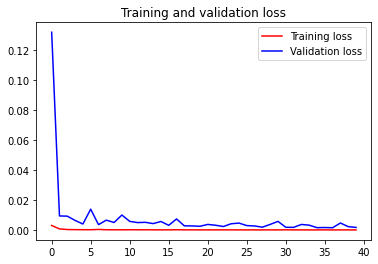

<Figure size 432x288 with 0 Axes>

In [ ]:
model.summary()
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape
print(train_predict)

[[0.02886896]
 [0.02896513]
 [0.02884041]
 ...
 [0.25992265]
 [0.26448712]
 [0.26655468]]


- # Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
print(train_predict)


[[ 3099.3738]
 [ 3105.7578]
 [ 3097.4783]
 ...
 [18437.615 ]
 [18740.623 ]
 [18877.875 ]]


- ## Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  605.0041156263806
Train data MSE:  366029.97992485884
Train data MAE:  383.9233119941166
-------------------------------------------------------------------------------------
Test data RMSE:  2786.2973312829045
Test data MSE:  7763452.818314235
Test data MAE:  2127.8189377478543


- ## Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9613730797245129
Test data explained variance regression score: 0.9269920139521687


- ## R square score for regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9611858939517268
Test data R2 score: 0.9188415386333113


- # Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
plotdf.head()

Train predicted data:  (1887, 1)
Test predicted data:  (1887, 1)


,date,original_close,train_predicted_close,test_predicted_close
942,2017-04-16,1182.939941,NaN,NaN
943,2017-04-17,1193.910034,NaN,NaN
944,2017-04-18,1211.670044,NaN,NaN
945,2017-04-19,1210.290039,NaN,NaN
946,2017-04-20,1229.079956,NaN,NaN


- # Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
      
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  60


- # Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

new_pred_plot.tail()
new_pred_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_original_days_value   160 non-null    float64
 1   next_predicted_days_value  160 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

print(lstmdf[0])

1182.939941


In [ ]:

sample = lstmdf.copy()
sampledf = pd.DataFrame(sample, columns =['Prices'])

sampledf['Date'] = pd.date_range(start='2017-04-15', periods=len(sampledf), freq='D')
sampledf = sampledf[['Date','Prices']]



In [ ]:
sampledf.to_csv('result.csv')
!cp result.csv "drive/My Drive/MiniProject-Model/"

model.save("mysavedmodel.h5")